# Comparaison entre les 2 signaux sur une même fenêtre d'observation

## Importation des librairies nécéssaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from datetime import datetime
from scipy import signal

# Preparation des données

## Importation

In [2]:
data_real = pd.read_csv('./sigma_Cband.csv', sep=",")
data_real_2 = pd.read_csv('./sigma_Lband.csv', sep=",")
data_real_3 = pd.read_csv('./sigma_Pband.csv', sep=",")

## Affichage

In [5]:
#  Série 1
data = data_real.to_numpy()
time_serie = pd.Series(data[:, 2], dtype='float64')
time_serie = time_serie.dropna()

#  Série 2
data2 = data_real_2.to_numpy()
time_serie2 = pd.Series(data2[:, 2], dtype='float64')
time_serie2 = time_serie2.dropna()

data3 = data_real_3.to_numpy()
time_serie3 = pd.Series(data3[:, 2], dtype='float64')
time_serie3 = time_serie3.dropna()

# Remettre les dates correctement

In [7]:
d = data[0,0] + " " + data[0,1]
print(d)
# Retirer les préfixes pour correspondre au format
d_cleaned = d.replace("Y", "").replace("M", "").replace("D", "").replace("H", "")
# Parser la chaîne nettoyée avec le bon format
parsed_date = datetime.strptime(d_cleaned, "%Y-%m-%d %H%M")
print(parsed_date)

Y2021-M08-D01 00H15
2021-08-01 00:15:00


In [9]:
def dates (data) :
    for i in range(len(data)) :
        d = data[i,0] + " " + data[i,1]
        d_cleaned = d.replace("Y", "").replace("M", "").replace("D", "").replace("H", "")
        parsed_date = datetime.strptime(d_cleaned, "%Y-%m-%d %H%M")
        data[i,0] = parsed_date
    data = data[:,[0,2]]
    return data

In [11]:
data = dates(data)
data2 = dates(data2)
data3 = dates(data3)

In [13]:
print(data)

[[datetime.datetime(2021, 8, 1, 0, 15) 51.97420130770133]
 [datetime.datetime(2021, 8, 1, 0, 30) 51.73640336244893]
 [datetime.datetime(2021, 8, 1, 0, 45) 52.26539536816637]
 ...
 [datetime.datetime(2021, 8, 31, 23, 30) 52.87303331851852]
 [datetime.datetime(2021, 8, 31, 23, 45) 52.728172020330376]
 [datetime.datetime(2021, 9, 1, 0, 0) 53.06370219866631]]


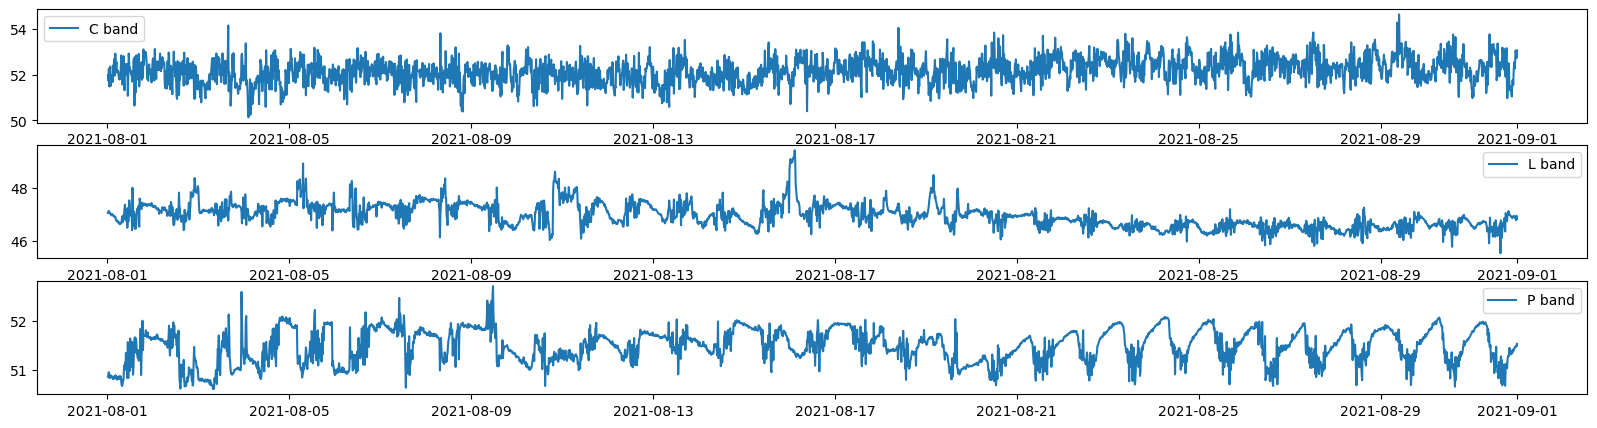

In [15]:
# Affichage des séries
fig, ax = plt.subplots(3, 1, figsize=(20, 5))
datetime_data = data[:,0]
ax[0].plot(datetime_data,time_serie, label='C band')
ax[0].legend()
ax[1].plot(datetime_data,time_serie2, label='L band')
ax[1].legend()
ax[2].plot(datetime_data,time_serie3, label='P band')
ax[2].legend()
plt.show()

# Nettoyage des données

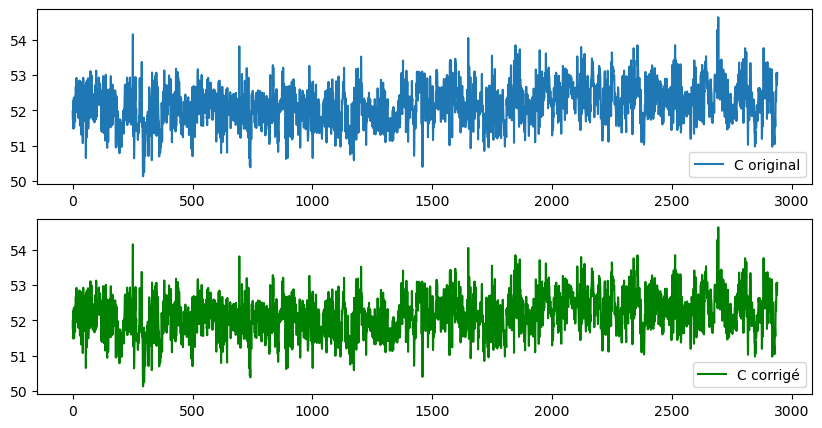

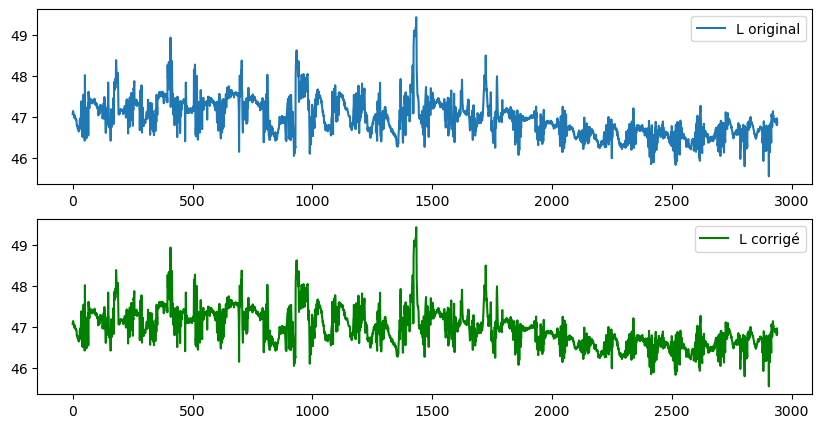

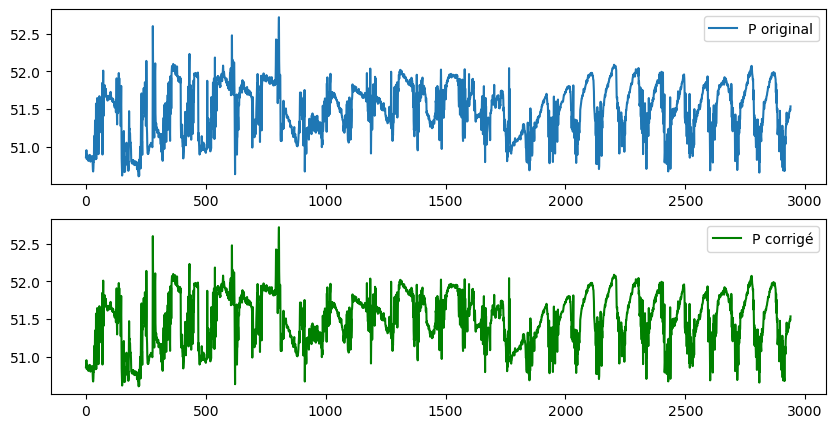

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie, label="C original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="C corrigé", color='green')
plt.legend()
plt.show()

#####

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie2)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie2.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie2, label="L original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="L corrigé", color='green')
plt.legend()
plt.show()

#####

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie3)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie3.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie3, label="P original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="P corrigé", color='green')
plt.legend()
plt.show()

# Fréquence de 15

In [19]:
# Pas de temps de la série 1

def freq_15 (data) :
    data_time = data[:, 0]
    differences_minutes = [
        (data_time[i] - data_time[i-1]).total_seconds() / 60
        for i in range(1, len(data_time))
    ]

    print("Difference between two measurements for the time serie : ")
    print(np.unique(differences_minutes))

    start_time = data_time[0]
    end_time = data_time[-1]
    regular_time = pd.date_range(start=start_time, end=end_time, freq="15min")

    # Créer un DataFrame pour les données existantes
    df = pd.DataFrame({'time': data_time, 'value': data[:,1]})

    # Réindexer sur la série temporelle régulière
    df_regular = pd.DataFrame({'time': regular_time}).merge(df, on='time', how='left')

    # Interpoler les valeurs manquantes
    df_regular['value'] = df_regular['value'].interpolate(method='linear')

    # Résultat
    df_regular = df_regular.to_numpy()
    data_time = df_regular[:, 0]
    differences_minutes = [
        (data_time[i] - data_time[i-1]).total_seconds() / 60
        for i in range(1, len(data_time))
    ]

    print("Difference between two measurements for the time serie : ")
    print(np.unique(differences_minutes))

freq_15 (data)
freq_15 (data2)
freq_15 (data3)

Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]
Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]
Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]


/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_31734/936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')
/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_31734/936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')
/var/folders/gn/sy_p6gyd0s15vprgs70pb0dr0000gn/T/ipykernel_31734/936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')


In [21]:
time_serie_1 = data[:,1]
time_serie_2 = data2[:,1]
time_serie_3 = data3[:,1]

# Autocorrélation des signaux

Dans un premier temps on va regarder l'autocorrélation des signaux avec eux mêmes.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


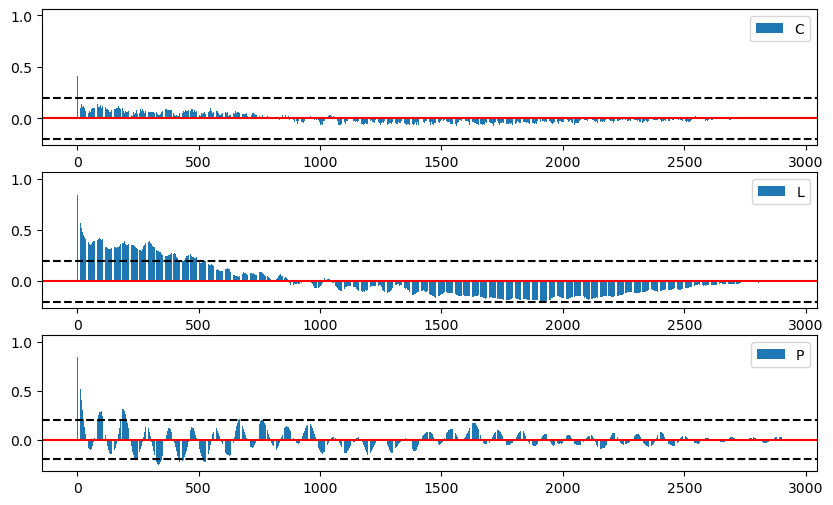

In [23]:
max_lag = 2900
acf_values_1 = sm.tsa.acf(time_serie_1, nlags = max_lag)
acf_values_2 = sm.tsa.acf(time_serie_2, nlags = max_lag)
acf_values_3 = sm.tsa.acf(time_serie_3, nlags = max_lag)

# Affichage de l'autocorrélation
fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].bar(range(max_lag + 1), acf_values_1, label='C')
ax[0].axhline(y=0.2, color='black', linestyle='--')
ax[0].axhline(y=0, color='red')
ax[0].axhline(y=-0.2, color='black', linestyle='--')
ax[0].legend()
ax[1].bar(range(max_lag + 1), acf_values_2, label='L')
ax[1].axhline(y=0.2, color='black', linestyle='--')
ax[1].axhline(y=0, color='red')
ax[1].axhline(y=-0.2, color='black', linestyle='--')
ax[1].legend()
ax[2].bar(range(max_lag + 1), acf_values_3, label='P')
ax[2].axhline(y=0.2, color='black', linestyle='--')
ax[2].axhline(y=0, color='red')
ax[2].axhline(y=-0.2, color='black', linestyle='--')
ax[2].legend()
plt.show()

## Transformée de Fourier

In [25]:
# Fonction qui permet de passer l'axe des abscisses en jours
def freq_to_day (freq) :
    return (1/freq)/(60*24*24)

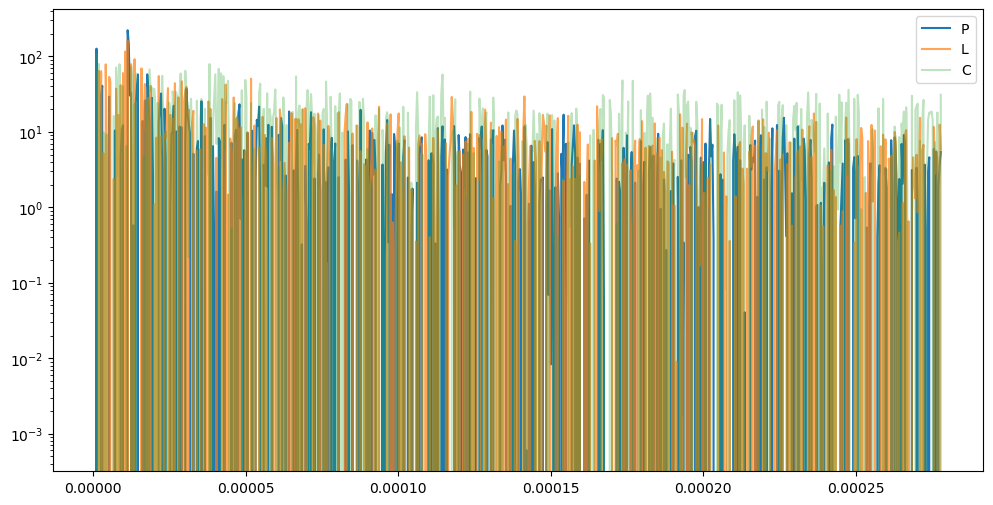

Période ayant la plus grande amplitude signal C : 25.520833333333332 j
Période ayant la plus grande amplitude signal L : 2.5520833333333335 j
Période ayant la plus grande amplitude signal P : 2.5520833333333335 j


In [39]:
amplitudes1 = np.real(np.fft.rfft(time_serie_1))[3:]
frequencies1 = np.fft.rfftfreq(len(time_serie_1),15*60)[2:]

amplitudes2 = np.real(np.fft.rfft(time_serie_2)) [3:]
frequencies2 = np.fft.rfftfreq(len(time_serie_2),15*60)[2:]

amplitudes3 = np.real(np.fft.rfft(time_serie_3))[3:]
frequencies3 = np.fft.rfftfreq(len(time_serie_3),15*60)[2:]

plt.figure(figsize=(12, 6))
plt.semilogy(frequencies3[:len(frequencies3)//2], amplitudes3[:len(amplitudes3)//2], label='P')
plt.legend()
#plt.show()
#plt.figure(figsize=(12, 6))
plt.semilogy(frequencies2[:len(frequencies2)//2], amplitudes2[:len(amplitudes2)//2], label='L', alpha=0.7)
plt.legend()
#plt.show()
#plt.figure(figsize=(12, 6))
plt.semilogy(frequencies1[:len(frequencies1)//2], amplitudes1[:len(amplitudes1)//2], label='C', alpha=0.3)
plt.legend()
plt.show()


print("Période ayant la plus grande amplitude signal C :", freq_to_day(frequencies1[np.argmax(amplitudes1)]),"j" )
print("Période ayant la plus grande amplitude signal L :", freq_to_day(frequencies2[np.argmax(amplitudes2)]),"j" )
print("Période ayant la plus grande amplitude signal P :", freq_to_day(frequencies3[np.argmax(amplitudes3)]),"j" )


### Detection harmoniques par moyenne par chunk

Dans cette méthode nous nous interessons non plus à la plus grande valeur sur une taille de chunk donnée mais à la moyenne des amplitudes (et donc des fréquences).

Pour cela on va comparer nos résultats avec 2 tailles de chunk différentes.

In [41]:
def average_by_chunk(frequencies, amplitudes, chunk_size=50):
    # Calcul du nombre de blocs
    num_chunks = len(frequencies) // chunk_size
    avg_frequencies = []
    avg_amplitudes = []
    
    # Diviser en blocs et calculer la moyenne
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size
        
        # Sélectionner les indices du bloc
        chunk_frequencies = frequencies[start_idx:end_idx]
        chunk_amplitudes = amplitudes[start_idx:end_idx]
        
        # Calculer la fréquence moyenne (c'est la fréquence du centre du bloc)
        avg_frequency = np.mean(chunk_frequencies)
        
        # Calculer l'amplitude moyenne du bloc
        avg_amplitude = np.mean(chunk_amplitudes)
        
        avg_frequencies.append(avg_frequency)
        avg_amplitudes.append(avg_amplitude)
    
    return np.array(avg_frequencies), np.array(avg_amplitudes)


In [47]:
chunk_size = 90
frequencies1_avg_90, amplitudes1_avg_90 = average_by_chunk(frequencies1, amplitudes1, chunk_size)
frequencies2_avg_90, amplitudes2_avg_90 = average_by_chunk(frequencies2, amplitudes2, chunk_size)
frequencies3_avg_90, amplitudes3_avg_90 = average_by_chunk(frequencies3, amplitudes3, chunk_size)

print("Chunk size = 90")
print("Harmoniques détectées signal C:")
print(f"Fréquence : {frequencies1_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies1_avg_90[0]):.6f} jours, Amplitude : {amplitudes1_avg_90[0]:.2f}")
print("Harmoniques détectées signal L:")
print(f"Fréquence : {frequencies2_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies2_avg_90[0]):.6f} jours, Amplitude : {amplitudes2_avg_90[0]:.2f}")
print("Harmoniques détectées signal P:")
print(f"Fréquence : {frequencies3_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies3_avg_90[0]):.6f} jours, Amplitude : {amplitudes3_avg_90[0]:.2f}")


Chunk size = 90
Harmoniques détectées signal C:
Fréquence : 0.000018 Hz, Fréquence : 1.646505 jours, Amplitude : 0.20
Harmoniques détectées signal L:
Fréquence : 0.000018 Hz, Fréquence : 1.646505 jours, Amplitude : 1.65
Harmoniques détectées signal P:
Fréquence : 0.000018 Hz, Fréquence : 1.646505 jours, Amplitude : -2.91


In [49]:
chunk_size = 120
frequencies1_avg_90, amplitudes1_avg_90 = average_by_chunk(frequencies1, amplitudes1, chunk_size)
frequencies2_avg_90, amplitudes2_avg_90 = average_by_chunk(frequencies2, amplitudes2, chunk_size)
frequencies3_avg_90, amplitudes3_avg_90 = average_by_chunk(frequencies3, amplitudes3, chunk_size)

print("Chunk size = 120")
print("Harmoniques détectées signal C:")
print(f"Fréquence : {frequencies1_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies1_avg_90[0]):.6f} jours, Amplitude : {amplitudes1_avg_90[0]:.2f}")
print("Harmoniques détectées signal L:")
print(f"Fréquence : {frequencies2_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies2_avg_90[0]):.6f} jours, Amplitude : {amplitudes2_avg_90[0]:.2f}")
print("Harmoniques détectées signal P:")
print(f"Fréquence : {frequencies3_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies3_avg_90[0]):.6f} jours, Amplitude : {amplitudes3_avg_90[0]:.2f}")

Chunk size = 120
Harmoniques détectées signal C:
Fréquence : 0.000023 Hz, Fréquence : 1.244919 jours, Amplitude : 1.94
Harmoniques détectées signal L:
Fréquence : 0.000023 Hz, Fréquence : 1.244919 jours, Amplitude : 0.52
Harmoniques détectées signal P:
Fréquence : 0.000023 Hz, Fréquence : 1.244919 jours, Amplitude : -3.12


## Densité spectrale Welch

Dans cette partie nous nous intéressons à la méthode de Welch qui est l'équivalent d'une transformée de Fourier mais qui permet d'obtenir de meilleurs résultats.

In [51]:
from scipy.signal import welch

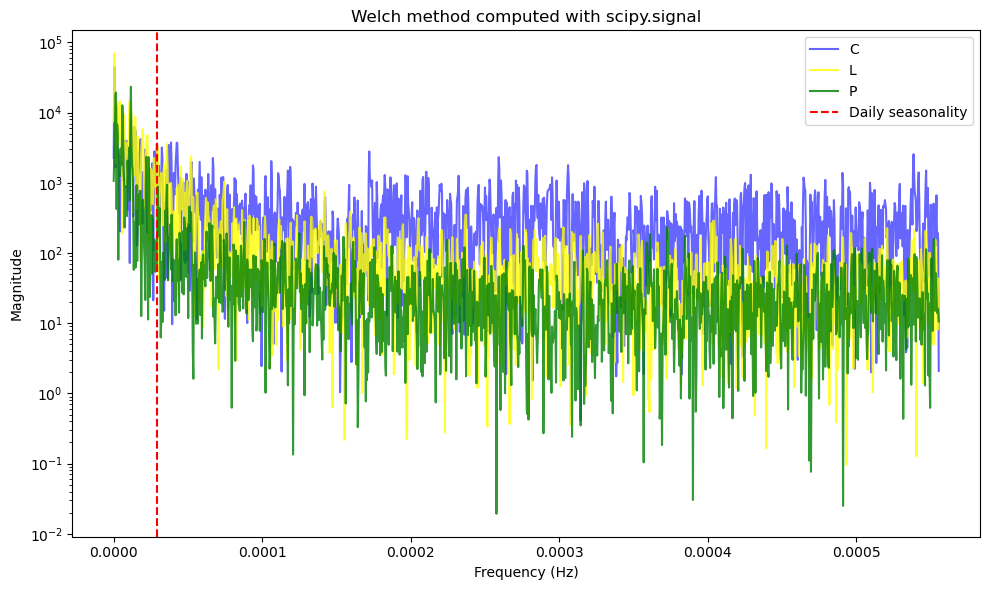

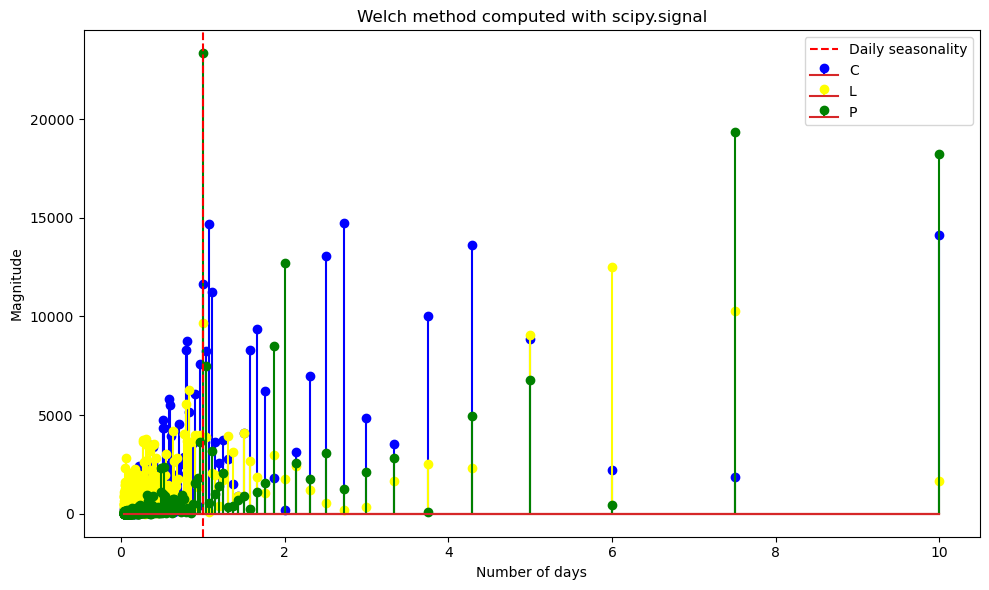

In [63]:
 #Paramètres de la méthode de Welch
nperseg = 2880 # 288
noverlap = int(nperseg/5)
fs = 1 / (60*15)

# Estimation de la PSD avec notre implémentation manuelle de Welch
frequencies_auto1, psd_auto1 = welch(time_serie_1, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")
frequencies_auto2, psd_auto2 = welch(time_serie_2, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")
frequencies_auto3, psd_auto3 = welch(time_serie_3, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")

# Tracé du résultat
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_auto1, np.abs(psd_auto1), label="C", color='blue', alpha = 0.6)
plt.semilogy(frequencies_auto2, np.abs(psd_auto2), label="L", color='yellow', alpha = 0.8)
plt.semilogy(frequencies_auto3, np.abs(psd_auto3), label="P", color='green', alpha = 0.8)
plt.axvline(x=1/(60*24*24), color='red', linestyle='--',label='Daily seasonality')
plt.title('Welch method computed with scipy.signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(((1/frequencies_auto2[3:len(frequencies_auto2)//2])/(60*60*24)), np.abs(psd_auto2[3:len(psd_auto2)//2]), label="C", linefmt='blue')
plt.stem(((1/frequencies_auto1[3:len(frequencies_auto1)//2])/(60*60*24)), np.abs(psd_auto1[3:len(psd_auto1)//2]), label="L", linefmt='yellow')
plt.stem(((1/frequencies_auto3[3:len(frequencies_auto3)//2])/(60*60*24)), np.abs(psd_auto3[3:len(psd_auto3)//2]), label="P", linefmt='green')
plt.axvline(x=1, color='red', linestyle='--',label='Daily seasonality')
plt.title('Welch method computed with scipy.signal')
plt.xlabel('Number of days')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.show()


In [65]:
max_psd_index1 = np.argmax(np.abs(psd_auto1))
max_psd_frequency1 = frequencies_auto1[max_psd_index1]

max_psd_index2 = np.argmax(np.abs(psd_auto2))
max_psd_frequency2 = frequencies_auto2[max_psd_index2]

max_psd_index3 = np.argmax(np.abs(psd_auto3))
max_psd_frequency3 = frequencies_auto3[max_psd_index3]


# Afficher la fréquence avec la plus grande PSD
print("---- Premiere PSD -----")
print(f"Fréquence avec la plus grande PSD pour C : {(1/max_psd_frequency1)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour L : {(1/max_psd_frequency2)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour P : {(1/max_psd_frequency3)/(60*60*24)} j")

psd_auto1_without_max = np.abs(psd_auto1).copy()  
psd_auto1_without_max[max_psd_index1] = -np.inf  
second_max_psd_index1 = np.argmax(psd_auto1_without_max)  
second_max_psd_frequency1 = frequencies_auto1[second_max_psd_index1]  

psd_auto2_without_max = np.abs(psd_auto2).copy()  
psd_auto2_without_max[max_psd_index2] = -np.inf  
second_max_psd_index2 = np.argmax(psd_auto2_without_max)  
second_max_psd_frequency2 = frequencies_auto2[second_max_psd_index2]

psd_auto3_without_max = np.abs(psd_auto3).copy()  
psd_auto3_without_max[max_psd_index3] = -np.inf  
second_max_psd_index3 = np.argmax(psd_auto3_without_max)  
second_max_psd_frequency3 = frequencies_auto3[second_max_psd_index3]

print("---- Deuxieme PSD -----")
print(f"Fréquence avec la plus grande PSD pour C : {(1/second_max_psd_frequency1)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour L : {(1/second_max_psd_frequency2)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour P : {(1/second_max_psd_frequency3)/(60*60*24)} j")

---- Premiere PSD -----
Fréquence avec la plus grande PSD pour C : 30.0 j
Fréquence avec la plus grande PSD pour L : 30.0 j
Fréquence avec la plus grande PSD pour P : 1.0 j
---- Deuxieme PSD -----
Fréquence avec la plus grande PSD pour C : 15.0 j
Fréquence avec la plus grande PSD pour L : 15.0 j
Fréquence avec la plus grande PSD pour P : 7.5 j


# Modélisation des séries temporelles

Une fois l'étape de décomposition spectrale réalisée on va maintenant regarde comment modéliser ces signaux à l'aide de différentes librairies mais aussi à la main.

### Modélisation avec la librairie STL

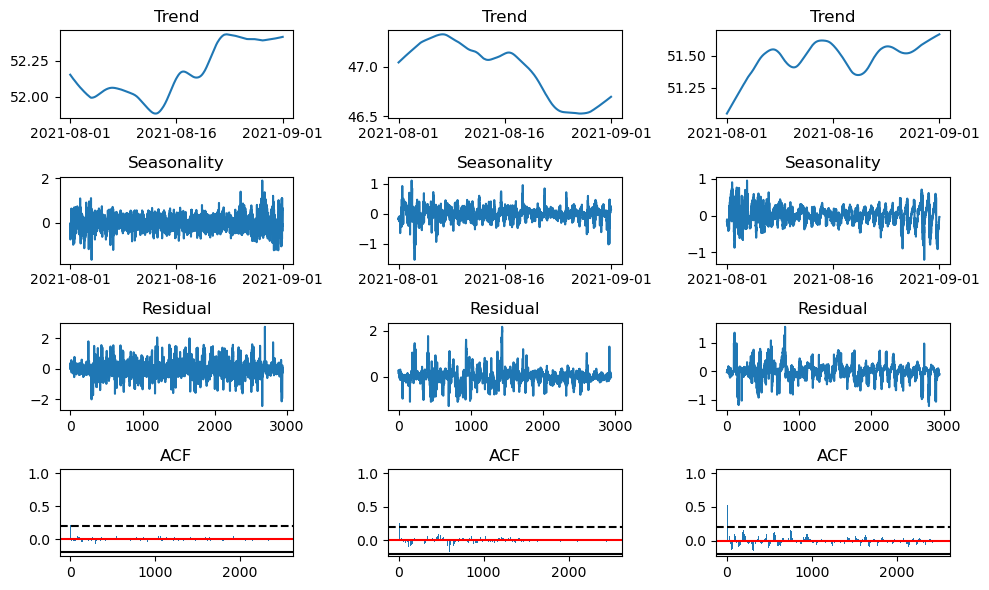

In [71]:
stl1 = STL(time_serie_1, period=5*60, robust = True)
result_stl1 = stl1.fit()

stl2 = STL(time_serie_2, period=5*60, robust = True)
result_stl2 = stl2.fit()

stl3 = STL(time_serie_3, period=5*60, robust = True)
result_stl3 = stl3.fit()

max_lag = 2500
acf_values_1 = sm.tsa.acf(result_stl1.resid, nlags = max_lag)
acf_values_2 = sm.tsa.acf(result_stl2.resid, nlags = max_lag)
acf_values_3 = sm.tsa.acf(result_stl3.resid, nlags = max_lag)

fig, ax = plt.subplots(4, 3, figsize=(10, 6))

num_ticks = 3
x_positions = np.linspace(0, len(datetime_data) - 1, num_ticks, dtype=int)
x_labels = [datetime_data[i] for i in x_positions]

ax[0,0].plot(datetime_data,result_stl1.trend)
ax[0,0].set_xticks(x_labels)
ax[0,0].set_title('Trend')
ax[1,0].plot(datetime_data,result_stl1.seasonal)
ax[1,0].set_xticks(x_labels)
ax[1,0].set_title('Seasonality')
ax[2,0].plot(result_stl1.resid)
ax[2,0].set_title('Residual')

ax[0,1].plot(datetime_data,result_stl2.trend)
ax[0,1].set_xticks(x_labels)
ax[0,1].set_title('Trend')
ax[1,1].plot(datetime_data,result_stl2.seasonal)
ax[1,1].set_xticks(x_labels)
ax[1,1].set_title('Seasonality')
ax[2,1].plot(result_stl2.resid)
ax[2,1].set_title('Residual')

ax[0,2].plot(datetime_data,result_stl3.trend)
ax[0,2].set_xticks(x_labels)
ax[0,2].set_title('Trend')
ax[1,2].plot(datetime_data,result_stl3.seasonal)
ax[1,2].set_xticks(x_labels)
ax[1,2].set_title('Seasonality')
ax[2,2].plot(result_stl3.resid)
ax[2,2].set_title('Residual')

ax[3,0].bar(range(max_lag + 1), acf_values_1)
ax[3,0].axhline(y=0.2, color='black', linestyle='--')
ax[3,0].axhline(y=0, color='red')
ax[3,0].axhline(y=-0.2, color='black')
ax[3,0].set_title('ACF')

ax[3,1].bar(range(max_lag + 1), acf_values_2)
ax[3,1].axhline(y=0.2, color='black', linestyle='--')
ax[3,1].axhline(y=0, color='red')
ax[3,1].axhline(y=-0.2, color='black')
ax[3,1].set_title('ACF')

ax[3,2].bar(range(max_lag + 1), acf_values_3)
ax[3,2].axhline(y=0.2, color='black', linestyle='--')
ax[3,2].axhline(y=0, color='red')
ax[3,2].axhline(y=-0.2, color='black')
ax[3,2].set_title('ACF')

plt.tight_layout()
plt.show()

**Observation**

Avec cette méthode, on peut observer que les résidus correspondent bien à des bruits blancs car leur autocorrélation ne présente qu'un seul pic supérieur à 0.2.

#### Intercorrelation

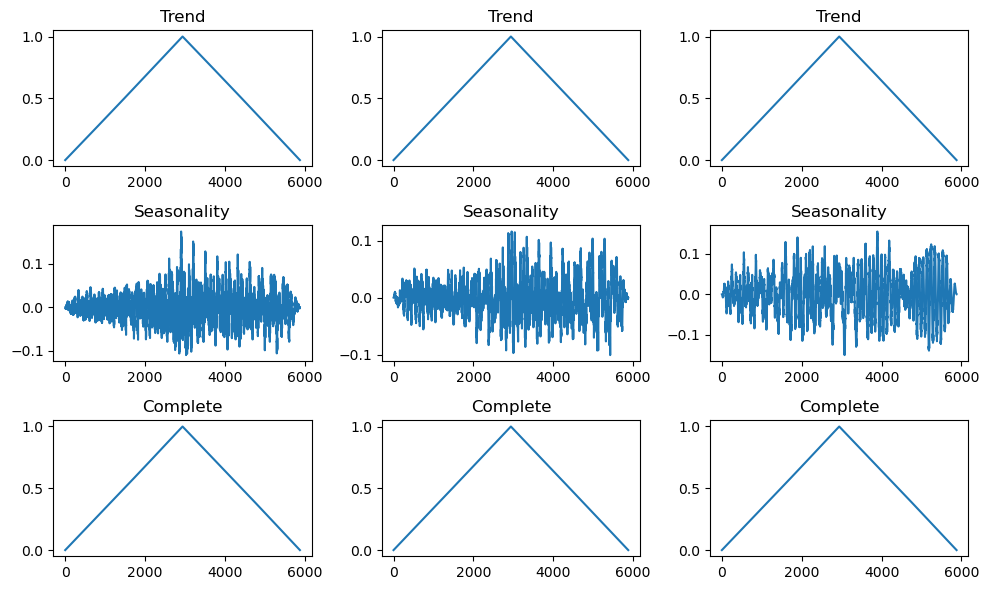

In [93]:
fig, ax = plt.subplots(3,3, figsize=(10, 6))

corr_t_12 = scipy.signal.correlate(result_stl1.trend,result_stl2.trend)
norm_factor_12 = np.sqrt(np.sum(result_stl1.trend**2) * np.sum(result_stl2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12
corr_t_13 = scipy.signal.correlate(result_stl1.trend,result_stl3.trend)
norm_factor_13 = np.sqrt(np.sum(result_stl1.trend**2) * np.sum(result_stl3.trend**2))
corr_t_normalized_13 = corr_t_13 / norm_factor_13
corr_t_32 = scipy.signal.correlate(result_stl3.trend,result_stl2.trend)
norm_factor_32 = np.sqrt(np.sum(result_stl3.trend**2) * np.sum(result_stl2.trend**2))
corr_t_normalized_32 = corr_t_32 / norm_factor_32

ax[0,0].plot(corr_t_normalized_12)
ax[0,0].set_title('Trend')
ax[0,1].plot(corr_t_normalized_13)
ax[0,1].set_title('Trend')
ax[0,2].plot(corr_t_normalized_32)
ax[0,2].set_title('Trend')

corr_s_12 = scipy.signal.correlate(result_stl1.seasonal,result_stl2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_stl1.seasonal**2) * np.sum(result_stl2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12
corr_s_13 = scipy.signal.correlate(result_stl1.seasonal,result_stl3.seasonal)
norm_factor_13 = np.sqrt(np.sum(result_stl1.seasonal**2) * np.sum(result_stl3.seasonal**2))
corr_s_normalized_13 = corr_s_13 / norm_factor_13
corr_s_32 = scipy.signal.correlate(result_stl3.seasonal,result_stl2.seasonal)
norm_factor_32 = np.sqrt(np.sum(result_stl3.seasonal**2) * np.sum(result_stl2.seasonal**2))
corr_s_normalized_32 = corr_s_32 / norm_factor_32

ax[1,0].plot(corr_s_normalized_12)
ax[1,0].set_title('Seasonality')
ax[1,1].plot(corr_s_normalized_13)
ax[1,1].set_title('Seasonality')
ax[1,2].plot(corr_s_normalized_32)
ax[1,2].set_title('Seasonality')

corr_a_12 = scipy.signal.correlate(time_serie_1,time_serie_2)
norm_factor_12 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_2**2))
corr_a_normalized_12 = corr_a_12 / norm_factor_12
corr_a_13 = scipy.signal.correlate(time_serie_1,time_serie_3)
norm_factor_13 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_3**2))
corr_a_normalized_13 = corr_a_13 / norm_factor_13
corr_a_32 = scipy.signal.correlate(time_serie_3,time_serie_2)
norm_factor_32 = np.sqrt(np.sum(time_serie_3**2) * np.sum(time_serie_2**2))
corr_a_normalized_32 = corr_a_12 / norm_factor_12

ax[2,0].plot(corr_a_normalized_12)
ax[2,0].set_title('Complete')
ax[2,1].plot(corr_a_normalized_13)
ax[2,1].set_title('Complete')
ax[2,2].plot(corr_a_normalized_32)
ax[2,2].set_title('Complete')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Seasonality P-L')

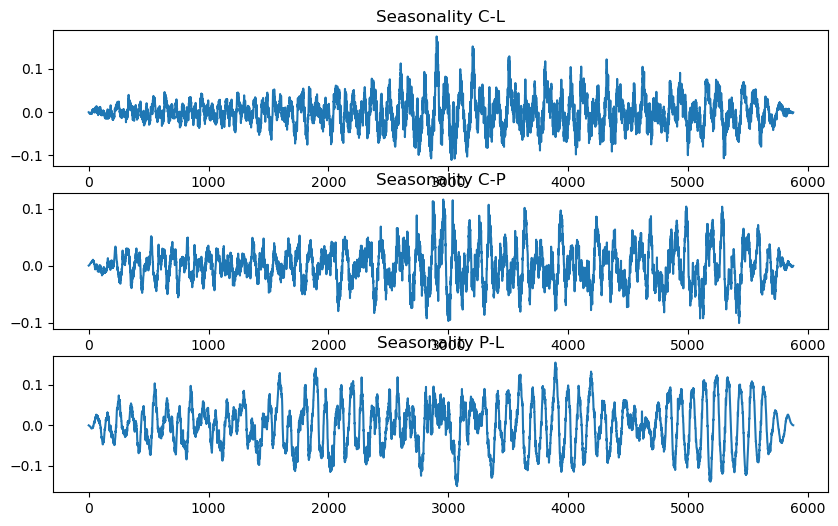

In [95]:
fig, ax = plt.subplots(3,1, figsize=(10, 6))

ax[0].plot(corr_s_normalized_12)
ax[0].set_title('Seasonality C-L')
ax[1].plot(corr_s_normalized_13)
ax[1].set_title('Seasonality C-P')
ax[2].plot(corr_s_normalized_32)
ax[2].set_title('Seasonality P-L')

### Modélisation avec la librairie MSTL

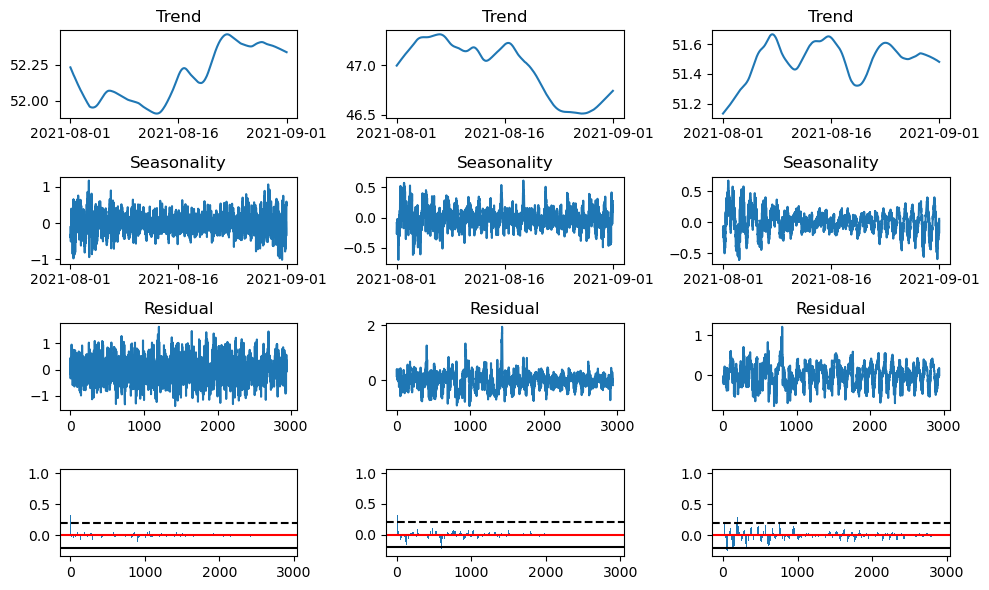

In [97]:
from statsmodels.tsa.seasonal import MSTL

mstl1 = MSTL(time_serie_1, periods=5*60)
result_mstl1 = mstl1.fit()

mstl2 = MSTL(time_serie_2, periods=5*60)
result_mstl2 = mstl2.fit()

mstl3 = MSTL(time_serie_3, periods=5*60)
result_mstl3 = mstl3.fit()

max_lag = 2900
acf_values_1 = sm.tsa.acf(result_mstl1.resid, nlags = max_lag)
acf_values_2 = sm.tsa.acf(result_mstl2.resid, nlags = max_lag)
acf_values_3 = sm.tsa.acf(result_mstl3.resid, nlags = max_lag)

fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].plot(datetime_data,result_mstl1.trend)
ax[0,0].set_xticks(x_labels)
ax[0,0].set_title('Trend')
ax[1,0].plot(datetime_data,result_mstl1.seasonal)
ax[1,0].set_xticks(x_labels)
ax[1,0].set_title('Seasonality')
ax[2,0].plot(result_mstl1.resid)
ax[2,0].set_title('Residual')

ax[0,1].plot(datetime_data,result_mstl2.trend)
ax[0,1].set_xticks(x_labels)
ax[0,1].set_title('Trend')
ax[1,1].plot(datetime_data,result_mstl2.seasonal)
ax[1,1].set_xticks(x_labels)
ax[1,1].set_title('Seasonality')
ax[2,1].plot(result_mstl2.resid)
ax[2,1].set_title('Residual')

ax[0,2].plot(datetime_data,result_mstl3.trend)
ax[0,2].set_xticks(x_labels)
ax[0,2].set_title('Trend')
ax[1,2].plot(datetime_data,result_mstl3.seasonal)
ax[1,2].set_xticks(x_labels)
ax[1,2].set_title('Seasonality')
ax[2,2].plot(result_mstl3.resid)
ax[2,2].set_title('Residual')

ax[3,0].bar(range(max_lag + 1), acf_values_1)
ax[3,0].axhline(y=0.2, color='black', linestyle='--')
ax[3,0].axhline(y=0, color='red')
ax[3,0].axhline(y=-0.2, color='black')

ax[3,1].bar(range(max_lag + 1), acf_values_2)
ax[3,1].axhline(y=0.2, color='black', linestyle='--')
ax[3,1].axhline(y=0, color='red')
ax[3,1].axhline(y=-0.2, color='black')

ax[3,2].bar(range(max_lag + 1), acf_values_3)
ax[3,2].axhline(y=0.2, color='black', linestyle='--')
ax[3,2].axhline(y=0, color='red')
ax[3,2].axhline(y=-0.2, color='black')

plt.tight_layout()
plt.show()

**Observation**

Avec cette méthode, on peut observer que les résidus correspondent bien à des bruits blancs car leur autocorrélation ne présente qu'un seul pic supérieur à 0.2.

#### Intercorrelation

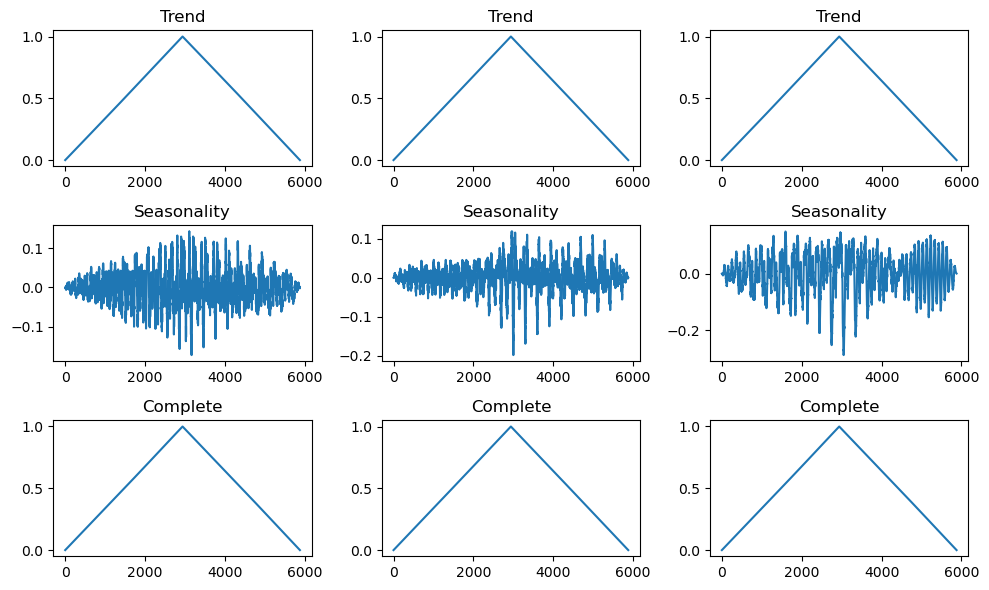

In [99]:
fig, ax = plt.subplots(3,3, figsize=(10, 6))

corr_t_12 = scipy.signal.correlate(result_mstl1.trend,result_mstl2.trend)
norm_factor_12 = np.sqrt(np.sum(result_mstl1.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12
corr_t_13 = scipy.signal.correlate(result_mstl1.trend,result_mstl3.trend)
norm_factor_13 = np.sqrt(np.sum(result_mstl1.trend**2) * np.sum(result_mstl3.trend**2))
corr_t_normalized_13 = corr_t_13 / norm_factor_13
corr_t_32 = scipy.signal.correlate(result_mstl3.trend,result_mstl2.trend)
norm_factor_32 = np.sqrt(np.sum(result_mstl3.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_32 = corr_t_32 / norm_factor_32

ax[0,0].plot(corr_t_normalized_12)
ax[0,0].set_title('Trend')
ax[0,1].plot(corr_t_normalized_13)
ax[0,1].set_title('Trend')
ax[0,2].plot(corr_t_normalized_32)
ax[0,2].set_title('Trend')

corr_s_12 = scipy.signal.correlate(result_mstl1.seasonal,result_mstl2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_mstl1.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12
corr_s_13 = scipy.signal.correlate(result_mstl1.seasonal,result_mstl3.seasonal)
norm_factor_13 = np.sqrt(np.sum(result_mstl1.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_s_normalized_13 = corr_s_13 / norm_factor_13
corr_s_32 = scipy.signal.correlate(result_mstl3.seasonal,result_mstl2.seasonal)
norm_factor_32 = np.sqrt(np.sum(result_mstl3.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_s_normalized_32 = corr_s_32 / norm_factor_32

ax[1,0].plot(corr_s_normalized_12)
ax[1,0].set_title('Seasonality')
ax[1,1].plot(corr_s_normalized_13)
ax[1,1].set_title('Seasonality')
ax[1,2].plot(corr_s_normalized_32)
ax[1,2].set_title('Seasonality')

corr_a_12 = scipy.signal.correlate(time_serie_1,time_serie_2)
norm_factor_12 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_2**2))
corr_a_normalized_12 = corr_a_12 / norm_factor_12
corr_a_13 = scipy.signal.correlate(time_serie_1,time_serie_3)
norm_factor_13 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_3**2))
corr_a_normalized_13 = corr_a_13 / norm_factor_13
corr_a_32 = scipy.signal.correlate(time_serie_3,time_serie_2)
norm_factor_32 = np.sqrt(np.sum(time_serie_3**2) * np.sum(time_serie_2**2))
corr_a_normalized_32 = corr_a_12 / norm_factor_12

ax[2,0].plot(corr_a_normalized_12)
ax[2,0].set_title('Complete')
ax[2,1].plot(corr_a_normalized_13)
ax[2,1].set_title('Complete')
ax[2,2].plot(corr_a_normalized_32)
ax[2,2].set_title('Complete')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Seasonality P-L')

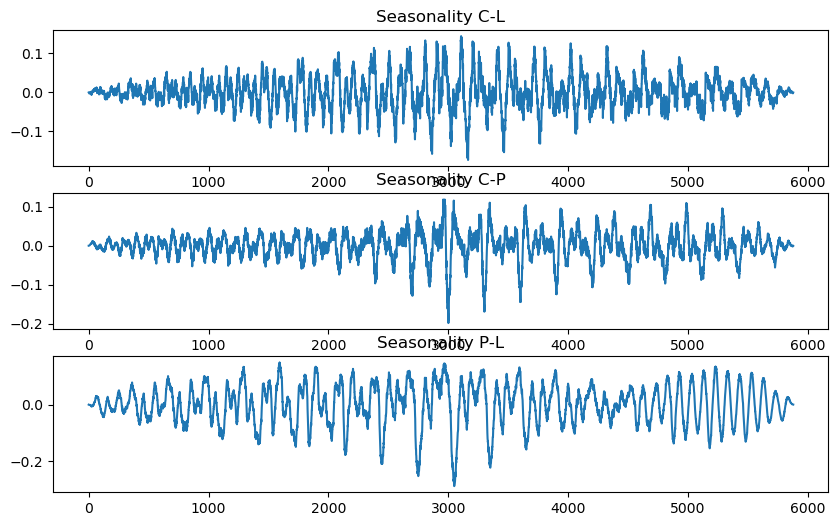

In [101]:
fig, ax = plt.subplots(3,1, figsize=(10, 6))

ax[0].plot(corr_s_normalized_12)
ax[0].set_title('Seasonality C-L')
ax[1].plot(corr_s_normalized_13)
ax[1].set_title('Seasonality C-P')
ax[2].plot(corr_s_normalized_32)
ax[2].set_title('Seasonality P-L')

### Modélisation avec seasonal_decompose

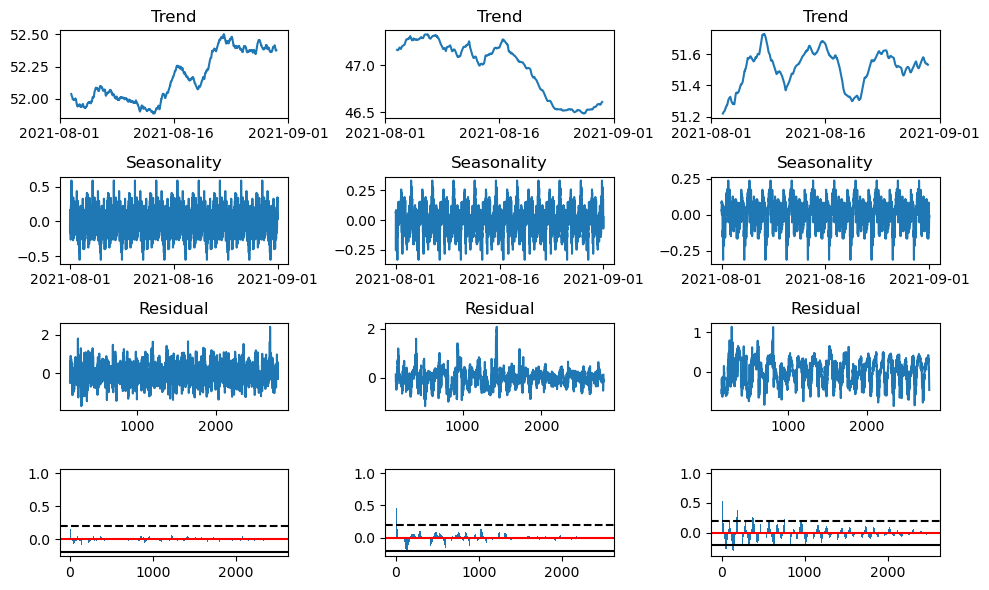

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_sd1 = seasonal_decompose(time_serie_1, model='additive', period=60*5)
result_sd2 = seasonal_decompose(time_serie_2, model='additive', period=60*5)
result_sd3 = seasonal_decompose(time_serie_3, model='additive', period=60*5)

max_lag = 2500
acf_values_1 = sm.tsa.acf(result_sd1.resid, nlags = max_lag, missing="drop")
acf_values_2 = sm.tsa.acf(result_sd2.resid, nlags = max_lag, missing="drop")
acf_values_3 = sm.tsa.acf(result_sd3.resid, nlags = max_lag, missing="drop")

fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].plot(datetime_data,result_sd1.trend)
ax[0,0].set_xticks(x_labels)
ax[0,0].set_title('Trend')
ax[1,0].plot(datetime_data,result_sd1.seasonal)
ax[1,0].set_xticks(x_labels)
ax[1,0].set_title('Seasonality')
ax[2,0].plot(result_sd1.resid)
ax[2,0].set_title('Residual')

ax[0,1].plot(datetime_data,result_sd2.trend)
ax[0,1].set_xticks(x_labels)
ax[0,1].set_title('Trend')
ax[1,1].plot(datetime_data,result_sd2.seasonal)
ax[1,1].set_xticks(x_labels)
ax[1,1].set_title('Seasonality')
ax[2,1].plot(result_sd2.resid)
ax[2,1].set_title('Residual')

ax[0,2].plot(datetime_data,result_sd3.trend)
ax[0,2].set_xticks(x_labels)
ax[0,2].set_title('Trend')
ax[1,2].plot(datetime_data,result_sd3.seasonal)
ax[1,2].set_xticks(x_labels)
ax[1,2].set_title('Seasonality')
ax[2,2].plot(result_sd3.resid)
ax[2,2].set_title('Residual')

ax[3,0].bar(range(max_lag + 1), acf_values_1)
ax[3,0].axhline(y=0.2, color='black', linestyle='--')
ax[3,0].axhline(y=0, color='red')
ax[3,0].axhline(y=-0.2, color='black')

ax[3,1].bar(range(max_lag + 1), acf_values_2)
ax[3,1].axhline(y=0.2, color='black', linestyle='--')
ax[3,1].axhline(y=0, color='red')
ax[3,1].axhline(y=-0.2, color='black')

ax[3,2].bar(range(max_lag + 1), acf_values_3)
ax[3,2].axhline(y=0.2, color='black', linestyle='--')
ax[3,2].axhline(y=0, color='red')
ax[3,2].axhline(y=-0.2, color='black')

plt.tight_layout()
plt.show()

**Observation**

Avec cette méthode, on peut observer que les résidus ne correspondent pas à des bruits blancs car leur autocorrélation présente plusieurs pics supérieurs à 0.2. En effet, si l'on regarde de plus près les résidus, on voit une saisonnalité encore. 

Cette méthode n'est donc pas la meilleure pour modéliser nos signaux et isoler correctement leur tendance et leur saisonnalité.

#### Intercorrelation

/opt/anaconda3/lib/python3.11/site-packages/scipy/signal/_signaltools.py:247: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


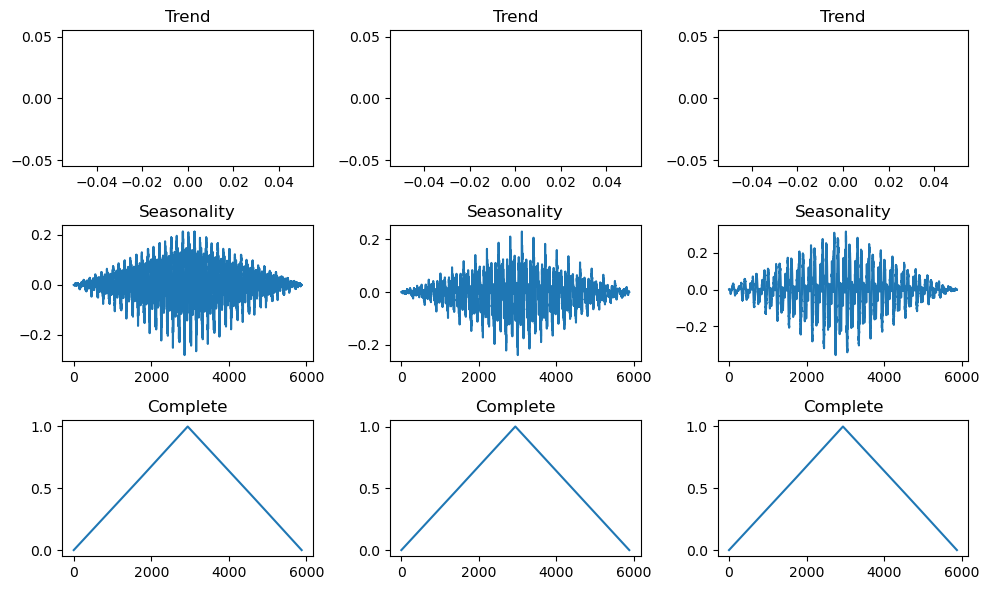

In [113]:
fig, ax = plt.subplots(3,3, figsize=(10, 6))

corr_t_12 = scipy.signal.correlate(result_sd1.trend,result_sd2.trend)
norm_factor_12 = np.sqrt(np.sum(result_sd1.trend**2) * np.sum(result_sd2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12
corr_t_13 = scipy.signal.correlate(result_sd1.trend,result_sd3.trend)
norm_factor_13 = np.sqrt(np.sum(result_sd1.trend**2) * np.sum(result_sd3.trend**2))
corr_t_normalized_13 = corr_t_13 / norm_factor_13
corr_t_32 = scipy.signal.correlate(result_sd3.trend,result_sd2.trend)
norm_factor_32 = np.sqrt(np.sum(result_sd3.trend**2) * np.sum(result_sd2.trend**2))
corr_t_normalized_32 = corr_t_32 / norm_factor_32

ax[0,0].plot(corr_t_normalized_12)
ax[0,0].set_title('Trend')
ax[0,1].plot(corr_t_normalized_13)
ax[0,1].set_title('Trend')
ax[0,2].plot(corr_t_normalized_32)
ax[0,2].set_title('Trend')

corr_s_12 = scipy.signal.correlate(result_sd1.seasonal,result_sd2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_sd1.seasonal**2) * np.sum(result_sd2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12
corr_s_13 = scipy.signal.correlate(result_sd1.seasonal,result_sd3.seasonal)
norm_factor_13 = np.sqrt(np.sum(result_sd1.seasonal**2) * np.sum(result_sd3.seasonal**2))
corr_s_normalized_13 = corr_s_13 / norm_factor_13
corr_s_32 = scipy.signal.correlate(result_sd3.seasonal,result_sd2.seasonal)
norm_factor_32 = np.sqrt(np.sum(result_sd3.seasonal**2) * np.sum(result_sd2.seasonal**2))
corr_s_normalized_32 = corr_s_32 / norm_factor_32

ax[1,0].plot(corr_s_normalized_12)
ax[1,0].set_title('Seasonality')
ax[1,1].plot(corr_s_normalized_13)
ax[1,1].set_title('Seasonality')
ax[1,2].plot(corr_s_normalized_32)
ax[1,2].set_title('Seasonality')

corr_a_12 = scipy.signal.correlate(time_serie_1,time_serie_2)
norm_factor_12 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_2**2))
corr_a_normalized_12 = corr_a_12 / norm_factor_12
corr_a_13 = scipy.signal.correlate(time_serie_1,time_serie_3)
norm_factor_13 = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_3**2))
corr_a_normalized_13 = corr_a_13 / norm_factor_13
corr_a_32 = scipy.signal.correlate(time_serie_3,time_serie_2)
norm_factor_32 = np.sqrt(np.sum(time_serie_3**2) * np.sum(time_serie_2**2))
corr_a_normalized_32 = corr_a_12 / norm_factor_12

ax[2,0].plot(corr_a_normalized_12)
ax[2,0].set_title('Complete')
ax[2,1].plot(corr_a_normalized_13)
ax[2,1].set_title('Complete')
ax[2,2].plot(corr_a_normalized_32)
ax[2,2].set_title('Complete')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Seasonality P-L')

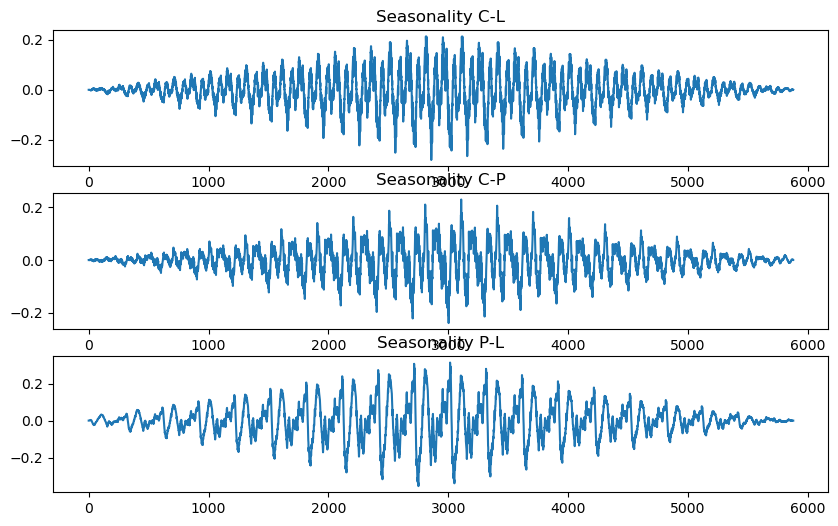

In [115]:
fig, ax = plt.subplots(3,1, figsize=(10, 6))

ax[0].plot(corr_s_normalized_12)
ax[0].set_title('Seasonality C-L')
ax[1].plot(corr_s_normalized_13)
ax[1].set_title('Seasonality C-P')
ax[2].plot(corr_s_normalized_32)
ax[2].set_title('Seasonality P-L')

# Analyse de la saisonnalité (périodes et déphasage)

On cherche dans cette méthode à comparer les saisonnalités obtenues pour les 2 signaux. En efffet on est censés retrouvé une période correspondant à un jour. Cependant, les dendromètres ne sont pas placés à la même hauteur donc on s'attend à observer une différence de phase.

## STL

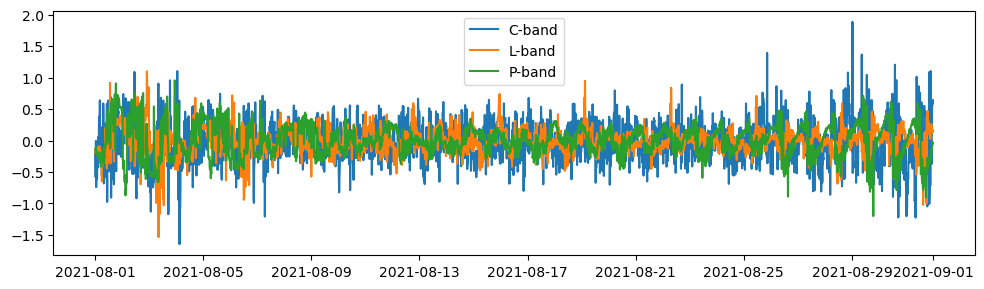

In [117]:
plt.figure(figsize=(10, 3))
plt.plot(datetime_data,result_stl1.seasonal, label = "C-band")
plt.plot(datetime_data,result_stl2.seasonal, label = "L-band")
plt.plot(datetime_data,result_stl3.seasonal, label = "P-band")
plt.legend()
plt.tight_layout()
plt.show()

In [119]:
seasonal1 = result_stl1.seasonal
seasonal2 = result_stl2.seasonal
seasonal3 = result_stl3.seasonal

amplitudes1 = np.real(np.fft.rfft(seasonal1))
frequencies1 = np.fft.rfftfreq(len(seasonal1),5*60) 
amplitudes2 = np.real(np.fft.rfft(seasonal2))
frequencies2 = np.fft.rfftfreq(len(seasonal2),5*60) 
amplitudes3 = np.real(np.fft.rfft(seasonal3))
frequencies3 = np.fft.rfftfreq(len(seasonal3),5*60) 

peaks1, _ = scipy.signal.find_peaks(amplitudes1, height=np.mean(amplitudes1) * 0.03)
frequence_principale1 = frequencies1[peaks1[0]] 
periode_principale1 = 1 / frequence_principale1
peaks2, _ = scipy.signal.find_peaks(amplitudes2, height=np.mean(amplitudes2) * 0.03)
frequence_principale2 = frequencies2[peaks2[0]] 
periode_principale2 = 1 / frequence_principale2
peaks3, _ = scipy.signal.find_peaks(amplitudes3, height=np.mean(amplitudes3) * 0.03)
frequence_principale3 = frequencies3[peaks3[0]] 
periode_principale3 = 1 / frequence_principale3

print(f"C-band --> Fréquence dominante : {frequence_principale1*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale1 / (3600*24):.2f} jours")
print(f"L-band --> Fréquence dominante : {frequence_principale2*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale2 / (3600*24):.2f} jours")
print(f"P-band --> Fréquence dominante : {frequence_principale3*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale3 / (3600*24):.2f} jours")

C-band --> Fréquence dominante : 1133.78685 1e-8 Hz, soit une période d'environ 1.02 jours
L-band --> Fréquence dominante : 340.13605 1e-8 Hz, soit une période d'environ 3.40 jours
P-band --> Fréquence dominante : 1020.40816 1e-8 Hz, soit une période d'environ 1.13 jours


In [121]:
# Détection des pics des deux signaux
peaks1, _ = scipy.signal.find_peaks(seasonal1)
peaks2, _ = scipy.signal.find_peaks(seasonal2)
peaks3, _ = scipy.signal.find_peaks(seasonal3)

# Calcul du temps des premiers pics (déphasage temporel)
time_peak1 = datetime_data[peaks1[0]]  # Premier pic du signal 1
time_peak2 = datetime_data[peaks2[0]]  # Premier pic du signal 2
time_peak3 = datetime_data[peaks3[0]]  # Premier pic du signal 2

# Déphasage temporel
delta_t_12 = (time_peak2 - time_peak1).total_seconds()
delta_t_13 = (time_peak3 - time_peak1).total_seconds()
delta_t_32 = (time_peak2 - time_peak3).total_seconds()

print(f"Déphasage entre C et L : {delta_t_12/60:.1f} min")
print(f"Déphasage entre C et P : {delta_t_13/60:.1f} min")
print(f"Déphasage entre P et L : {delta_t_32/60:.1f} min")

Déphasage entre C et L : 0.0 min
Déphasage entre C et P : 0.0 min
Déphasage entre P et L : 0.0 min


## MSTL

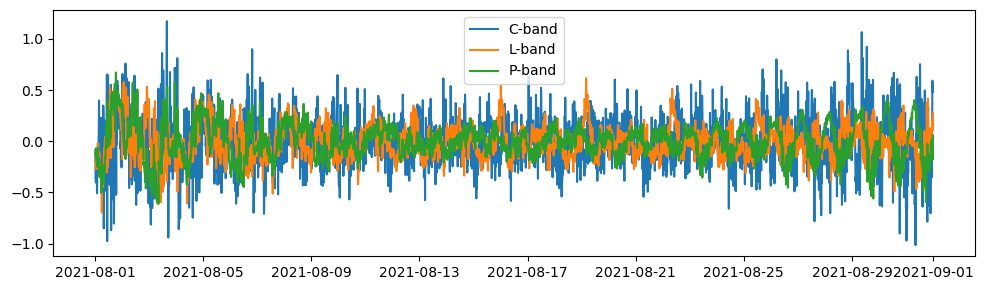

In [123]:
plt.figure(figsize=(10, 3))
plt.plot(datetime_data,result_mstl1.seasonal, label = "C-band")
plt.plot(datetime_data,result_mstl2.seasonal, label = "L-band")
plt.plot(datetime_data,result_mstl3.seasonal, label = "P-band")
plt.legend()
plt.tight_layout()
plt.show()

In [125]:
seasonal1 = result_mstl1.seasonal
seasonal2 = result_mstl2.seasonal
seasonal3 = result_mstl3.seasonal

amplitudes1 = np.real(np.fft.rfft(seasonal1))
frequencies1 = np.fft.rfftfreq(len(seasonal1),5*60) 
amplitudes2 = np.real(np.fft.rfft(seasonal2))
frequencies2 = np.fft.rfftfreq(len(seasonal2),5*60) 
amplitudes3 = np.real(np.fft.rfft(seasonal3))
frequencies3 = np.fft.rfftfreq(len(seasonal3),5*60) 

peaks1, _ = scipy.signal.find_peaks(amplitudes1, height=np.mean(amplitudes1) * 0.03)
frequence_principale1 = frequencies1[peaks1[0]] 
periode_principale1 = 1 / frequence_principale1
peaks2, _ = scipy.signal.find_peaks(amplitudes2, height=np.mean(amplitudes2) * 0.03)
frequence_principale2 = frequencies2[peaks2[0]] 
periode_principale2 = 1 / frequence_principale2
peaks3, _ = scipy.signal.find_peaks(amplitudes3, height=np.mean(amplitudes3) * 0.03)
frequence_principale3 = frequencies3[peaks3[0]] 
periode_principale3 = 1 / frequence_principale3

print(f"C-band --> Fréquence dominante : {frequence_principale1*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale1 / (3600*24):.2f} jours")
print(f"L-band --> Fréquence dominante : {frequence_principale2*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale2 / (3600*24):.2f} jours")
print(f"P-band --> Fréquence dominante : {frequence_principale3*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale3 / (3600*24):.2f} jours")

C-band --> Fréquence dominante : 1133.78685 1e-8 Hz, soit une période d'environ 1.02 jours
L-band --> Fréquence dominante : 340.13605 1e-8 Hz, soit une période d'environ 3.40 jours
P-band --> Fréquence dominante : 1020.40816 1e-8 Hz, soit une période d'environ 1.13 jours


In [127]:
# Détection des pics des deux signaux
peaks1, _ = scipy.signal.find_peaks(seasonal1)
peaks2, _ = scipy.signal.find_peaks(seasonal2)
peaks3, _ = scipy.signal.find_peaks(seasonal3)

# Calcul du temps des premiers pics (déphasage temporel)
time_peak1 = datetime_data[peaks1[0]]  # Premier pic du signal 1
time_peak2 = datetime_data[peaks2[0]]  # Premier pic du signal 2
time_peak3 = datetime_data[peaks3[0]]  # Premier pic du signal 2

# Déphasage temporel
delta_t_12 = (time_peak2 - time_peak1).total_seconds()
delta_t_13 = (time_peak3 - time_peak1).total_seconds()
delta_t_32 = (time_peak2 - time_peak3).total_seconds()

print(f"Déphasage entre C et L : {delta_t_12/60:.1f} min")
print(f"Déphasage entre C et P : {delta_t_13/60:.1f} min")
print(f"Déphasage entre P et L : {delta_t_32/60:.1f} min")

Déphasage entre C et L : 0.0 min
Déphasage entre C et P : -45.0 min
Déphasage entre P et L : 45.0 min


## Seasonal Decompose (SD)

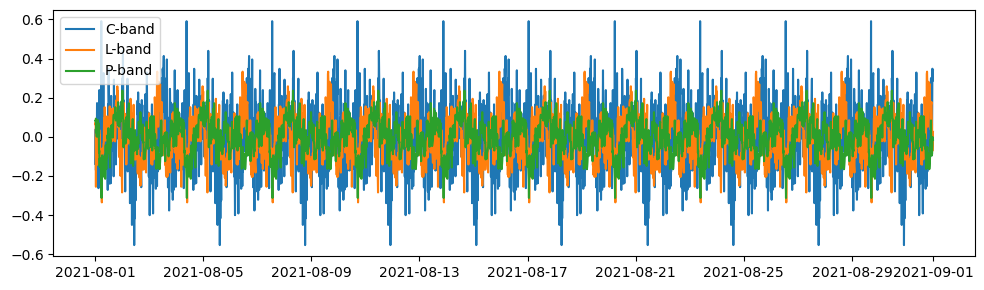

In [130]:
plt.figure(figsize=(10, 3))
plt.plot(datetime_data, result_sd1.seasonal, label = "C-band")
plt.plot(datetime_data,result_sd2.seasonal, label = "L-band")
plt.plot(datetime_data,result_sd3.seasonal, label = "P-band")
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
seasonal1 = result_sd1.seasonal
seasonal2 = result_sd2.seasonal
seasonal3 = result_sd3.seasonal

amplitudes1 = np.real(np.fft.rfft(seasonal1))
frequencies1 = np.fft.rfftfreq(len(seasonal1),5*60) 
amplitudes2 = np.real(np.fft.rfft(seasonal2))
frequencies2 = np.fft.rfftfreq(len(seasonal2),5*60) 
amplitudes3 = np.real(np.fft.rfft(seasonal3))
frequencies3 = np.fft.rfftfreq(len(seasonal3),5*60) 

peaks1, _ = scipy.signal.find_peaks(amplitudes1, height=np.mean(amplitudes1) * 0.03)
frequence_principale1 = frequencies1[peaks1[0]] 
periode_principale1 = 1 / frequence_principale1
peaks2, _ = scipy.signal.find_peaks(amplitudes2, height=np.mean(amplitudes2) * 0.03)
frequence_principale2 = frequencies2[peaks2[0]] 
periode_principale2 = 1 / frequence_principale2
peaks3, _ = scipy.signal.find_peaks(amplitudes3, height=np.mean(amplitudes3) * 0.03)
frequence_principale3 = frequencies3[peaks3[0]] 
periode_principale3 = 1 / frequence_principale3

print(f"C-band --> Fréquence dominante : {frequence_principale1*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale1 / (3600*24):.2f} jours")
print(f"L-band --> Fréquence dominante : {frequence_principale2*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale2 / (3600*24):.2f} jours")
print(f"P-band --> Fréquence dominante : {frequence_principale3*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale3 / (3600*24):.2f} jours")

C-band --> Fréquence dominante : 1133.78685 1e-8 Hz, soit une période d'environ 1.02 jours
L-band --> Fréquence dominante : 1020.40816 1e-8 Hz, soit une période d'environ 1.13 jours
P-band --> Fréquence dominante : 1020.40816 1e-8 Hz, soit une période d'environ 1.13 jours


In [134]:
# Détection des pics des deux signaux
peaks1, _ = scipy.signal.find_peaks(seasonal1)
peaks2, _ = scipy.signal.find_peaks(seasonal2)
peaks3, _ = scipy.signal.find_peaks(seasonal3)

# Calcul du temps des premiers pics (déphasage temporel)
time_peak1 = datetime_data[peaks1[0]]  # Premier pic du signal 1
time_peak2 = datetime_data[peaks2[0]]  # Premier pic du signal 2
time_peak3 = datetime_data[peaks3[0]]  # Premier pic du signal 2

# Déphasage temporel
delta_t_12 = (time_peak2 - time_peak1).total_seconds()
delta_t_13 = (time_peak3 - time_peak1).total_seconds()
delta_t_32 = (time_peak2 - time_peak3).total_seconds()

print(f"Déphasage entre C et L : {delta_t_12/60:.1f} min")
print(f"Déphasage entre C et P : {delta_t_13/60:.1f} min")
print(f"Déphasage entre P et L : {delta_t_32/60:.1f} min")

Déphasage entre C et L : 0.0 min
Déphasage entre C et P : 15.0 min
Déphasage entre P et L : -15.0 min
